# K-Means Clustering in Python
[Original practical guide](https://realpython.com/k-means-clustering-python)

[StackOverflow discussion](https://stackoverflow.com/a/62445280/7550928)

## Cluster Count Estimation Using the Elbow Method

Determine the number of clusters in the dataset using the **elbow method** from this Notebook.

Familiarize yourself with various clustering techniques:
[Determining the Number of Clusters in a Data Set – Wikipedia](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

Clustering is an **unsupervised machine learning** task. The main idea behind the elbow method is to identify the "elbow" (i.e., the point of inflection) on a plot that shows the relationship between:

- **Y-axis**: total within-cluster distance (also called inertia or distortion)
- **X-axis**: number of clusters (*k*)

The total distance on the Y-axis is typically the **sum of distances from each data point to its cluster centroid**. This distance can be computed using different metrics:

- **L1 (Manhattan)**: sum of absolute distances  
- **L2 (Euclidean)**: sum of squared distances  
- Or other distance metrics

In the example linked above, the **L2 metric** is used — specifically, the **sum of squared Euclidean distances** from each point to its centroid.

## Task

Replace the **L2 metric** with the **L1 metric** and plot the corresponding elbow curve. In other words, instead of computing the sum of squared distances, compute the **sum of absolute (linear) distances** from each point to its assigned centroid.

Then, **compare the elbow plots** for L1 and L2 metrics.  
**Question**: Did the optimal number of clusters change for this dataset when switching from L2 to L1?

Try more advanced datasets to compare L1 and L2 metrics.

### Deliverable

- A `.ipynb` file containing the **elbow plot using the L1 metric**.

---

## Optional Bonus Tasks

Apply the **silhouette method** instead of the elbow method:

- [Silhouette (Clustering) – Wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering))
- [Silhouette Method Example Notebook](https://colab.research.google.com/drive/1Eml-kaonpmvyOP7hrP320E9AwPzbUCUC#scrollTo=fhA3KOW9HqD5)
- [Advanced Clustering Evaluation Techniques – Real Python](https://realpython.com/k-means-clustering-python/#evaluating-clustering-performance-using-advanced-techniques)

Try other metrices.

## Elbow method and K-means

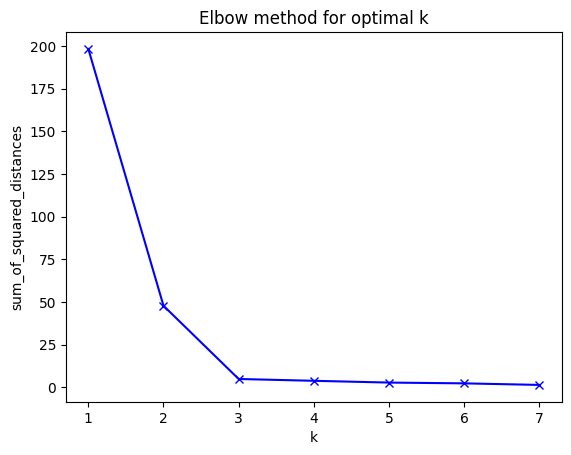

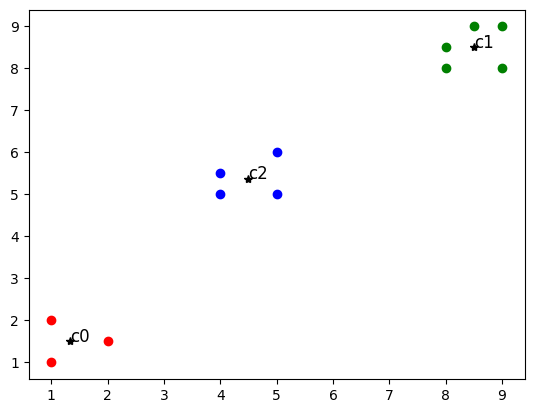

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


data=np.array([[1,1],[1,2],[2,1.5],                 # cluster 1
               [4,5],[5,6],[4,5.5],[5,5],           # cluster 2
               [8,8],[8,8.5],[9,8],[8.5,9],[9,9]])  # cluster 3


def find_best_k():
    sum_of_squared_distances = []
    K = range(1, 8)  # total of 8 clusters
    for k in K:
        km=KMeans(n_clusters=k)
        km=km.fit(data)
        sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('sum_of_squared_distances')
    plt.title('Elbow method for optimal k')
    plt.show()
    # The plot looks like an arm, and the elbow on the arm is the optimal k


def run_kmeans(k, data):  # k is the optimal number of clusters
    km=KMeans(n_clusters=k)
    km=km.fit(data)
    centroids = km.cluster_centers_  # get the center of clusters
    #print(centroids)
    return centroids


def plotresults():
    centroids=run_kmeans(3, data)  # in this example data has 3 optimal number of clusters
    plt.plot(data[0:3,0],  data[0:3,1],  'ro',  # red cluster
             data[3:7,0],  data[3:7,1],  'bo',  # blue cluster
             data[7:12,0], data[7:12,1], 'go')  # green cluster
    for i in range(3):
        plt.plot(centroids[i,0], centroids[i,1], 'k*')  # show black star ★
        plt.text(centroids[i,0], centroids[i,1], 'c'+str(i), fontsize=12)  # show 'ci'


find_best_k()
plotresults()